# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

## Stažení dat

In [1]:
#importy
import bs4
import pandas as pd
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

In [20]:
#zakladni url ze kterych vychazim
my_url_base = 'https://www.psp.cz/sqw/'
url_base_tail = 'hlasovani.sqw?o=8' 

In [21]:
#otevreni stranky
my_base_page = uReq(my_url_base+url_base_tail)

#stazeni stranky
base_page = my_base_page.read()

#zavreni
my_base_page.close()

In [22]:
#zpracovani na soup obj
base_soup = soup(base_page, "html.parser")

In [23]:
#najiti vsech odkazu na jednotlive schuze
meetings = base_soup.findAll("td",{"class":"col-number"})
meetings_url = []
for i in meetings:
    meetings_url.append(i.b.a["href"])

In [55]:
# vytvoreni pandas tabulky do ktere budu ukladat informace
deputies = pd.DataFrame(columns=['First_Name','Second_Name','Party','Vote','Num_Meeting','Num_Vote'])
# length = len(meetings_url) - pro pripad, ze bych chtel zaznamy ze vsech schuzi

# cislo aktualniho meetingu
num_meeting = 0

# iterace pres odkazy na schuze
for hj in range(10):  
    
    # opet postup na najiti odkazu dal a hozeni do soup
    current_meeting_url = my_url_base+meetings_url[hj]
    my_current_page = uReq(current_meeting_url)
    current_page = my_current_page.read()
    my_current_page.close()
    current_soup = soup(current_page, "html.parser")
    votes = current_soup.findAll("div",{"id":"main-content"})
    current_vote_url = my_url_base+votes[0].a["href"] # tady beru pouze nulty index protoze vsechny odkazy jsou stejne
    my_vote_page = uReq(current_vote_url)
    vote_page = my_vote_page.read()
    my_vote_page.close()
    vote_soup = soup(vote_page, "html.parser")
    a = vote_soup.findAll("div",{"class":"search-results"})
    final_url = []
    b = a[0].center.table.findAll("td",{"align":"CENTER"})
    for i in b:
        if i.a is not None:
            final_url.append(i.a["href"])
            
    # cislo soucastneho hlasovani na schuzce
    num_vote = 0
    
    # zde uz je iterace pres odkazy na konkretni hlasovani
    for fin_url in final_url:
        
        # otevření stranky se zaznamem o hlasování
        url = my_url_base+fin_url
        my_vote_page_final = uReq(url)
        vote_page_final = my_vote_page_final.read().decode(encoding="windows-1250") # vyreseni problemu s cestinou
        my_vote_page_final.close()
        final_soup = soup(vote_page_final, "html.parser", from_encoding="windows-1250")
        
        # ziskani seznamu stran, ktere volily
        current_parties = final_soup.select('body > div')[1].div.div.findAll("h2",{"class":"section-title center"})
        current_parties.pop(0)
        current_parties.pop()
        names_of_parties = []
        for curr_par in current_parties :
            names_of_parties.append(curr_par.span.get_text().split(' ')[0])
        
        # zde uz se iteruje pres jednotlive osoby a jejich hlasovani    
        current_deputies = final_soup.select('body > div')[1].div.div.findAll("ul",{"class":"results"})
        index = 0
        for depu in current_deputies:
            for h in depu.children:
                info = h.get_text().split(' ')
                name = (info[1].split())[0]
                surname = (info[1].split())[1]
                partyy = names_of_parties[index]
                deputies = deputies.append({'First_Name' : (info[1].split())[0], 'Second_Name' : (info[1].split())[1], 'Party' : names_of_parties[index], 'Vote' : info[0],'Num_Meeting' : num_meeting,'Num_Vote' : num_vote},ignore_index=True)
            index += 1
        num_vote += 1
    num_meeting += 1
deputies    

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


,First_Name,Second_Name,Party,Vote,Num_Meeting,Num_Vote
0,Věra,Adámková,ANO,A,0,0
1,Andrej,Babiš,ANO,A,0,0
2,Andrea,Babišová,ANO,A,0,0
3,Margita,Balaštíková,ANO,A,0,0
4,Josef,Bělica,ANO,A,0,0
5,Stanislav,Berkovec,ANO,A,0,0
6,Jiří,Bláha,ANO,A,0,0
7,Richard,Brabec,ANO,A,0,0
8,Milan,Brázdil,ANO,Z,0,0
9,Andrea,Brzobohatá,ANO,A,0,0


In [56]:
deputies.to_csv(r'Data\Data01.csv', index = False, encoding="windows-1250")

## druha cast

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
deputies = pd.read_csv(r'Data\Data01.csv', encoding="windows-1250")

In [2]:
test = deputies.copy()

In [3]:
parties = test.Party.unique()

In [4]:
parties_df = pd.DataFrame(columns=['Party_Name','Num_Meeting','Num_Vote','Yes','No','Skip','Miss','Decision','Unity', 'Ratio'])
l = len(test.Num_Meeting.unique())
for meet in range(l):
    j = len(test[(test.Num_Meeting==meet)].Num_Vote.unique())
    for vote in range(j):
        for party in parties:
            Ano = test[((test.Party==party) & (test.Num_Meeting==meet) & (test.Num_Vote==vote) & (test.Vote=='A'))].Party.count()
            Ne = test[((test.Party==party) & (test.Num_Meeting==meet) & (test.Num_Vote==vote) & (test.Vote=='N'))].Party.count()
            Zdrzel =  test[((test.Party==party) & (test.Num_Meeting==meet) & (test.Num_Vote==vote) & (test.Vote=='Z'))].Party.count()
            Neprisel =  test[((test.Party==party) & (test.Num_Meeting==meet) & (test.Num_Vote==vote) & (test.Vote=='0'))].Party.count()
            Rozhodnuti_strany = 'A'
            unity = max(Ano, Ne) / (test[((test.Party==party) & (test.Num_Meeting==meet) & (test.Num_Vote==vote))].Party.count() / 100)
            ratio = (Ano+Ne)/(test[((test.Party==party) & (test.Num_Meeting==meet) & (test.Num_Vote==vote))].Party.count()) * 100
            if Ne > Ano:
                Rozhodnuti_strany = 'N'
            parties_df = parties_df.append({'Party_Name' : party,'Num_Meeting' : meet,'Num_Vote':vote,'Yes':Ano,'No':Ne,'Skip':Zdrzel,'Miss':Neprisel,'Decision': Rozhodnuti_strany, 'Unity':unity, 'Ratio':ratio},ignore_index=True)

In [5]:
parties_df.head()

,Party_Name,Num_Meeting,Num_Vote,Yes,No,Skip,Miss,Decision,Unity,Ratio
0,ANO,0,0,74,0,2,2,A,94.871795,94.871795
1,ODS,0,0,24,0,0,1,A,96.000000,96.000000
2,Piráti,0,0,22,0,0,0,A,100.000000,100.000000
3,SPD,0,0,22,0,0,0,A,100.000000,100.000000
4,ČSSD,0,0,13,0,2,0,A,86.666667,86.666667


In [6]:
parties_df_test = parties_df.groupby(['Num_Meeting','Num_Vote'])
shoda = np.zeros((len(parties), len(parties)))
for index,vote in parties_df_test :
    decision = vote.reset_index().Decision
    for i in range(9):
        for j in range(9):
            if decision[i] == decision[j]:
                shoda[i, j] += 1 
shoda = shoda/shoda.max() * 100            

Text(0.5, 1, 'Shoda v hlasovani mezi stranami v %')

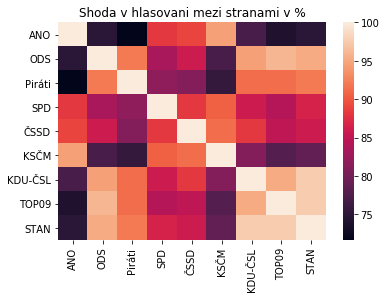

In [7]:
ax = plt.axes()
sns.heatmap(shoda,ax = ax, xticklabels=parties, yticklabels=parties)
ax.set_title('Shoda v hlasovani mezi stranami v %')

In [8]:
parties_df_overall = pd.DataFrame(columns=['Party_Name','Unity', 'Ratio'])
for i in parties:
    y = parties_df[(parties_df.Party_Name == i)].Ratio
    avr_unity = (parties_df[(parties_df.Party_Name == i)].Unity.sum() / parties_df[(parties_df.Party_Name == i)].Unity.count())
    avr_ratio = (parties_df[(parties_df.Party_Name == i)].Ratio.sum() / parties_df[(parties_df.Party_Name == i)].Ratio.count()) 
    parties_df_overall = parties_df_overall.append({'Party_Name' : i,'Unity':avr_unity, 'Ratio':avr_ratio},ignore_index=True)

In [9]:
parties_df.head()

,Party_Name,Num_Meeting,Num_Vote,Yes,No,Skip,Miss,Decision,Unity,Ratio
0,ANO,0,0,74,0,2,2,A,94.871795,94.871795
1,ODS,0,0,24,0,0,1,A,96.000000,96.000000
2,Piráti,0,0,22,0,0,0,A,100.000000,100.000000
3,SPD,0,0,22,0,0,0,A,100.000000,100.000000
4,ČSSD,0,0,13,0,2,0,A,86.666667,86.666667


In [10]:
merged = pd.merge(test.rename(columns={"Party": "Party_Name"}),parties_df, on=['Num_Meeting', 'Num_Vote', 'Party_Name'])
merged['match'] = (merged.Vote == merged.Decision)
merged['miss'] = (merged.Vote == '0')
merged['not_vote'] = (merged.Vote == 'Z')
merged['count'] = merged.Vote

In [11]:
merged = merged.groupby(by=['First_Name', 'Second_Name', 'Party_Name']).agg({'match':sum, 'miss':sum, 'not_vote':sum, 'count':'count'}).reset_index()

In [12]:
merged['match'] = merged['match'] / merged['count'] * 100
merged['miss'] = merged['miss'] / merged['count'] * 100
merged['not_vote'] = merged['not_vote'] / merged['count'] * 100

In [13]:
plot_deputies = merged[merged.match > 50].sort_values('match').head()

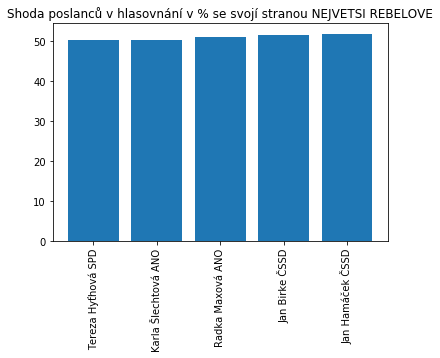

In [14]:
plt.bar((plot_deputies['First_Name']+" "+plot_deputies['Second_Name']+" "+plot_deputies['Party_Name']), plot_deputies['match'], align='center')
plt.xticks(rotation = 'vertical')
plt.title('Shoda poslanců v hlasovnání v % se svojí stranou NEJVETSI REBELOVE')
plt.show()

In [15]:
plot_parties = parties_df_overall.sort_values('Unity')

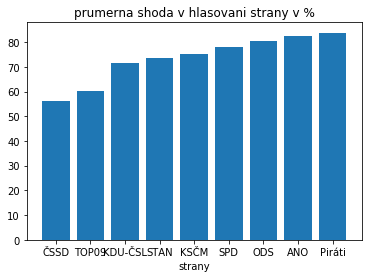

In [16]:

plt.bar(plot_parties['Party_Name'], plot_parties['Unity'], align='center')
plt.xlabel('strany')
plt.title('prumerna shoda v hlasovani strany v %')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXAAAAEWCAYAAAB/tMx4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nO3debgcVZnH8e+PhISExbDchECA4BBRBAlwZdFBwqYsauKASgQMgpPBFRAXYBzIIGp4XIAZl5nIFpQtggiDgmAAQRTCDbIHCUuAmJBchBDCJoF3/jinodLpvrf7rqnw+zzPfW7XqVNVb5+ufuv0qe4qRQRmZlY+a/R3AGZm1jVO4GZmJeUEbmZWUk7gZmYl5QRuZlZSTuBmZiXlBG7dImm0pJA0sIfWF5K26ol1dbCNcZLmdzD/fEmn9WYMvUXS/ZLG9Xcc1jecwM1WIxHx7oi4qZllOjugrcokbZ8PWk9LOq5Qvqak2yVt1p/x9TYn8F7SUz3Ssm7fVi+r8P70XeCrwPbANyVtnMu/AlweEU/2W2R9wAm8CZLmSTpR0gOSnpV0nqS18rxxkuZL+oakp4DzJB0h6Y9V63hjiCB/VP+JpGskLZN0q6SNJZ2Z1/+gpB0Ky24i6XJJ7ZIek/Tlwrwpki6T9AtJS4EjctkMSRdIej73VFoLy5wg6ZE87wFJH+vgue8sqU3SUkmLJP2wqsqhkp7IPaF/Lyw3OD+fBfnvTEmDC/O/Jmlhnndk1TYPlPSXvM0nJU3pIL45kj5cmB6YY9mxg2WOl7Q4b/8zdeqsL+nq3ObP5sejCvOPkPRobsPHJB2ay9eQ9E1Jj+dtXCDpbXnetZK+WLWduyX9S358Vn6+SyXNlrR7oV5nr+k8SfvUeS4H5Nf5eUl/k/RVSWsD1wCb5H1wWd7Pau1PO0v6s6Qluc1+JGlQYf0h6WhJc3Nb/VjJYEnPSNquUHe4pJcktVTFODivf9tCWUuuO7zG09oSuCEi/gbMBTaXtDlwEHBGrXZYrUSE/xr8A+YB9wGbARsAtwKn5XnjgOXA6cBgYAhwBPDHqnUEsFV+fD7wNLATsBZwA/AY8GlgAHAacGOuuwYwGzgZGAS8HXgU+FCePwV4FZiQ6w7JZS8DB+T1fRe4rRDLx4FNcv1PAi8AI+s89z8Dh+fH6wC75sej83P6Wd7m9sArwLvy/FOB24DhQAvwJ+Bbed5+wCJgW2Bt4KKq9hkHbJfje0+uO6FOfCcDFxamDwQerFO38lqdCqyZ2+dFYP3C61J5XTckJYOhwLrAL4Ff53lrA0uBrfP0SODd+fGRwMP5dVoH+BXw8zzv08CthXi2AZYAg/P0YXm7A4HjgaeAtQqvc0ev6TxgnzrPeyGwe368PrBjoT3mV9Wdwsr7007Arjmu0cAc4NiqfftqYBiwOdAO7Jfn/QQ4vVD3GOD/6sR5LvDtwvQXgGvr1P0l8BFgVG6nDYFfA+P6O1/0SU7q7wDK9JffHEcXpg8AHsmPxwH/qLzRctkRdJ7Af1aY9yVgTmF6O2BJfrwL8ETVuk4EzsuPpwA3V82fAvy+ML0N8FIHz+8uYHydeTcD/wlsVFU+Oj+nUYWyWcAh+fEjwAGFeR8C5uXH5wJTC/PeUWyfGjGcCZxRZ95WwPPA0Dx9IXBynbrjgJeAgYWyxbx5UDqfnMBrLDsWeDY/XpuUeA8ChlTVmwl8vjC9NSkhDiQdCF4Atsjzvg2c28Hr8iywfSOvKR0n8CeAfwPWq9EetRL4zfViynWOBa6o2rf/uTA9AzihsP8+CayRp9uAT9RZ7z7Ao4XpW4FP16m7BfBb4E5gIvBR4OekA8iVwB+Aj3f0PMr85yGU5hXH1B4n9WAr2iPi5SbXt6jw+KUa0+vkx1uQPuYuqfwBJwEj6sRW8VTh8YvAWsrjmZI+Lemuwvq2BTaqE+dRpAT7oKQ7isMVdbZTiXsTUjtVFNtsE1ZuzzdI2kXSjXn44jng6HrxRcTDpB7hRyQNJb2RL6rzXAD+HhHL68RcjGGopP/NQyFLSQeyYZIGRMQLpE8uRwMLJf1G0js7eN4DgRER8TzwG+CQPO8Q0gGnss3j85DQc/l1eVvV8677mnbiIFKn43FJf5C0Wyf1V9ifJL0jDyE9ldviO6z8etTcDyLidtJBa4/cRlsBV9XZ7g3AkPz6b0E6aF5Rq2JEPB4RB0TEjqSEfSppTPz7wKWk/eCHkjbo5LmWkhN484pntTcHFhSmqy/t+ALpozcAevMES1c8CTwWEcMKf+tGxAEdbL+u/Mb4GfBFYMOIGEYaHlKt+hExNyImkoZCTgcuy+OnnVlAOvhUFNtsISu3Z9FFpDf5ZhHxNuB/6sWXXUzqhY0HHshJvbuOJ/Wed4mI9YAP5HIBRMTvImJf0vDJg6Q2hdrPezlvHqAvBibmJDoEuBEgj3d/A/gEaUhnGPAcHT/vhkTEHRExnvQa/prUQ4b6+011+U9Jz3FMbouTmoxrOml46HDgsnqdnYh4Pcc2EfgUcHU+6HXmZODsiFhE+vTaFhHPAfNJB4zVjhN4874gaVQ+op9EOsrXczfwbkljlU52TunGdmcBS5VOkg6RNEDStpLe28X1rU16g7YDKJ3E27ZeZUmHSWrJb64lufi1BrZzMenbAS2SNiK9yX6R580gnRzbJveaT6ladl3gmYh4WdLOpDdzRy4BPgh8jo57381Yl/RJaEl+zd+IUdIISR/NB7JXgGW82SYXA8dJ2lLSOqTe6qWFXv9vSQn+1Fz+emF7y0mvy0BJJwPrdfdJSBok6VBJb4uIV0lj95VYFwEbKp9k7cC6eblluRf9uSbD+DnwMVISv6CTuheRPt0cSgOvpaRtSENBP81FjwF7SRoBjCENH612nMCbdxFwHekE4qOkE401RcRDpDfo70lnyP9Yr25nIuI10smasaSd82ngbNLH666s7wHgB6STk5Uey60dLLIfcL+kZcBZpDHuRoaLTiONd94D3Esaqzwtx3ANaVz7BtIJvxuqlv08cKqk50mJfwYdiIiF+fm8j44PrM04k9RDfpp0Mvbawrw1SD30BcAzwB45Zkjj+z8nDbk8Rjrx+KVCrK+QTmzuw4oJ6nekb4U8RBp2eZnaQ2NdcTgwLw9/HE1KpETEg6QDzqN5OG2TOst/lXQQfZ70SaOpNo6I+aTXP4BbOqlbGXLZhNQenfkxcEx+n0A6P/Rl4H7gOxHxVN0lS0z5RIA1QNI84LMR8fv+jsWsjCSdCyyIiG/2dyyrg1X1y/lmtpqRNBr4F2CHjmtaozyEYma9TtK3SCfJvxcRj/V3PKsLD6GYmZWUe+BmZiXVp2PgG220UYwePbovN2lmVnqzZ89+OiJaqsv7NIGPHj2atra2vtykmVnpSXq8VrmHUMzMSsoJ3MyspJzAzcxKygnczKyknMDNzErKCdzMrKScwM3MSsoJ3MyspJzAzcxKypeTNbO3pNEn/KbPtjVv6oG9sl73wM3MSsoJ3MyspDyEYmZ9pi+HLaD3hi5WFe6Bm5mVlBO4mVlJNZTAJR0n6X5J90m6WNJakraUdLukuZIulTSot4M1M7M3dZrAJW0KfBlojYhtgQHAIcDpwBkRMQZ4FjiqNwM1M7MVNXoScyAwRNKrwFBgIbAX8Kk8fzowBfhpTwdoZt23Onzn2VbWaQ88Iv4GfB94gpS4nwNmA0siYnmuNh/YtNbykiZLapPU1t7e3jNRm5lZQ0Mo6wPjgS2BTYC1gf1rVI1ay0fEtIhojYjWlpaV7slpZmZd1MhJzH2AxyKiPSJeBX4FvA8YJqkyBDMKWNBLMZqZWQ2NJPAngF0lDZUkYG/gAeBG4OBcZxJwZe+EaGZmtTQyBn47cBlwJ3BvXmYa8A3gK5IeBjYEzunFOM3MrEpD30KJiFOAU6qKHwV27vGIzFYT/tm49Tb/EtPMrKScwM3MSsoJ3MyspJzAzcxKygnczKyknMDNzErKd+Sx1Yq/umdvJe6Bm5mVlBO4mVlJOYGbmZWUx8CtR/iGAWZ9zz1wM7OScgI3MyspJ3Azs5JyAjczKymfxCwx/2jF7K2tkZsaby3prsLfUknHStpA0vWS5ub/6/dFwGZmljRyS7W/RsTYiBgL7AS8CFwBnADMjIgxwMw8bWZmfaTZMfC9gUci4nFgPDA9l08HJvRkYGZm1rFmE/ghwMX58YiIWAiQ/w+vtYCkyZLaJLW1t7d3PVIzM1tBwwlc0iDgo8Avm9lAREyLiNaIaG1paWk2PjMzq6OZHvj+wJ0RsShPL5I0EiD/X9zTwZmZWX3NJPCJvDl8AnAVMCk/ngRc2VNBmZlZ5xpK4JKGAvsCvyoUTwX2lTQ3z5va8+GZmVk9Df2QJyJeBDasKvs76VspZmbWD/xTejOzknICNzMrKSdwM7OScgI3MyspJ3Azs5JyAjczKykncDOzknICNzMrKSdwM7OScgI3MyspJ3Azs5JyAjczKykncDOzknICNzMrKSdwM7OSavSGDsMkXSbpQUlzJO0maQNJ10uam/+v39vBmpnZmxrtgZ8FXBsR7wS2B+YAJwAzI2IMMDNPm5lZH+k0gUtaD/gAcA5ARPwjIpYA44Hpudp0YEJvBWlmZitr5JZqbwfagfMkbQ/MBo4BRkTEQoCIWChpeO+FuWoZfcJv+mxb86Ye2GfbMrNyaWQIZSCwI/DTiNgBeIEmhkskTZbUJqmtvb29i2GamVm1RhL4fGB+RNyepy8jJfRFkkYC5P+Lay0cEdMiojUiWltaWnoiZjMzo4EEHhFPAU9K2joX7Q08AFwFTMplk4AreyVCMzOrqZExcIAvARdKGgQ8CnyGlPxnSDoKeAL4eO+EaGZmtTSUwCPiLqC1xqy9ezYcMzNrlH+JaWZWUk7gZmYl5QRuZlZSTuBmZiXV6LdQ+l1f/voR/AtIM1v1uQduZlZSTuBmZiXlBG5mVlJO4GZmJeUEbmZWUk7gZmYl5QRuZlZSTuBmZiXlBG5mVlJO4GZmJeUEbmZWUg1dC0XSPOB54DVgeUS0StoAuBQYDcwDPhERz/ZOmGZmVq2ZHvieETE2Iip35jkBmBkRY4CZNHGnejMz677uDKGMB6bnx9OBCd0Px8zMGtVoAg/gOkmzJU3OZSMiYiFA/j+81oKSJktqk9TW3t7e/YjNzAxo/Hrg74+IBZKGA9dLerDRDUTENGAaQGtra3QhRjMzq6GhHnhELMj/FwNXADsDiySNBMj/F/dWkGZmtrJOE7iktSWtW3kMfBC4D7gKmJSrTQKu7K0gzcxsZY0MoYwArpBUqX9RRFwr6Q5ghqSjgCeAj/demGZmVq3TBB4RjwLb1yj/O7B3bwRlZmad8y8xzcxKygnczKyknMDNzErKCdzMrKScwM3MSsoJ3MyspJzAzcxKygnczKyknMDNzErKCdzMrKScwM3MSsoJ3MyspJzAzcxKygnczKyknMDNzErKCdzMrKQaTuCSBkj6i6Sr8/SWkm6XNFfSpZIG9V6YZmZWrZke+DHAnML06cAZETEGeBY4qicDMzOzjjWUwCWNAg4Ezs7TAvYCLstVpgMTeiNAMzOrrdEe+JnA14HX8/SGwJKIWJ6n5wOb1lpQ0mRJbZLa2tvbuxWsmZm9qdMELunDwOKImF0srlE1ai0fEdMiojUiWltaWroYppmZVev0rvTA+4GPSjoAWAtYj9QjHyZpYO6FjwIW9F6YZmZWrdMeeEScGBGjImI0cAhwQ0QcCtwIHJyrTQKu7LUozcxsJd35Hvg3gK9Iepg0Jn5Oz4RkZmaNaGQI5Q0RcRNwU378KLBzz4dkZmaN8C8xzcxKygnczKyknMDNzErKCdzMrKScwM3MSsoJ3MyspJzAzcxKygnczKyknMDNzErKCdzMrKScwM3MSsoJ3MyspJzAzcxKygnczKyknMDNzEqqkXtiriVplqS7Jd0v6T9z+ZaSbpc0V9Klkgb1frhmZlbRSA/8FWCviNgeGAvsJ2lX4HTgjIgYAzwLHNV7YZqZWbVG7okZEbEsT66Z/wLYC7gsl08HJvRKhGZmVlNDY+CSBki6C1gMXA88AizJd6QHmA9s2jshmplZLQ0l8Ih4LSLGAqNI98F8V61qtZaVNFlSm6S29vb2rkdqZmYraOpbKBGxhHRT412BYZIqN0UeBSyos8y0iGiNiNaWlpbuxGpmZgWNfAulRdKw/HgIsA8wB7gRODhXmwRc2VtBmpnZygZ2XoWRwHRJA0gJf0ZEXC3pAeASSacBfwHO6cU4zcysSqcJPCLuAXaoUf4oaTzczMz6gX+JaWZWUk7gZmYl5QRuZlZSTuBmZiXlBG5mVlJO4GZmJeUEbmZWUk7gZmYl5QRuZlZSTuBmZiXlBG5mVlJO4GZmJeUEbmZWUk7gZmYl5QRuZlZSTuBmZiXVyC3VNpN0o6Q5ku6XdEwu30DS9ZLm5v/r9364ZmZW0UgPfDlwfES8i3Qz4y9I2gY4AZgZEWOAmXnazMz6SKcJPCIWRsSd+fHzpBsabwqMB6bnatOBCb0VpJmZraypMXBJo0n3x7wdGBERCyEleWB4nWUmS2qT1Nbe3t69aM3M7A0NJ3BJ6wCXA8dGxNJGl4uIaRHRGhGtLS0tXYnRzMxqaCiBS1qTlLwvjIhf5eJFkkbm+SOBxb0TopmZ1dLIt1AEnAPMiYgfFmZdBUzKjycBV/Z8eGZmVs/ABuq8HzgcuFfSXbnsJGAqMEPSUcATwMd7J0QzM6ul0wQeEX8EVGf23j0bjpmZNcq/xDQzKykncDOzknICNzMrKSdwM7OScgI3MyspJ3Azs5JyAjczKykncDOzknICNzMrKSdwM7OScgI3MyspJ3Azs5JyAjczKykncDOzknICNzMrKSdwM7OSauSWaudKWizpvkLZBpKulzQ3/1+/d8M0M7NqjfTAzwf2qyo7AZgZEWOAmXnazMz6UKcJPCJuBp6pKh4PTM+PpwMTejguMzPrRFfHwEdExEKA/H94vYqSJktqk9TW3t7exc2ZmVm1Xj+JGRHTIqI1IlpbWlp6e3NmZm8ZXU3giySNBMj/F/dcSGZm1oiuJvCrgEn58STgyp4Jx8zMGtXI1wgvBv4MbC1pvqSjgKnAvpLmAvvmaTMz60MDO6sQERPrzNq7h2MxM7Mm+JeYZmYl5QRuZlZSTuBmZiXlBG5mVlJO4GZmJeUEbmZWUk7gZmYl5QRuZlZSTuBmZiXlBG5mVlJO4GZmJeUEbmZWUk7gZmYl5QRuZlZSTuBmZiXlBG5mVlLdSuCS9pP0V0kPSzqhp4IyM7POdTmBSxoA/BjYH9gGmChpm54KzMzMOtadHvjOwMMR8WhE/AO4BBjfM2GZmVlnFBFdW1A6GNgvIj6bpw8HdomIL1bVmwxMzpNbA3/terhdshHwdB9vs5ZVJQ5wLLWsKnHAqhPLqhIHOJYtIqKlurDTmxp3QDXKVjoaRMQ0YFo3ttMtktoiorW/tr+qxQGOZVWOA1adWFaVOMCx1NOdIZT5wGaF6VHAgu6FY2ZmjepOAr8DGCNpS0mDgEOAq3omLDMz60yXh1AiYrmkLwK/AwYA50bE/T0WWc/pt+GbKqtKHOBYallV4oBVJ5ZVJQ5wLDV1+SSmmZn1r1L+ElPSvpJOkjRd0qb9Hc/qQNLGki6Q9HVJB/R3PP1B0imSDpJ0Uf6dg9kqrbQ9cElHAE9ExA39HcvqQtI44O0RcW5/x9IfJK0JfA24JCIe7e94bNUn6UDg8Yi4r18CiIhS/QEbk3409AjwAPBb4B3AfwH3AfeSTrBumesfmcvuyfPH5/LzgceAu4GHgAuATTvY7obAXfnvKeBvhenNgSuBuTmus4BBeblxwHPAX4A5wCmFdZ4IPEz6bvyHCuXH5FjvB14plB+Qt7E5MKUQw1zgV8A2hbrzgI0K0+OAq+s8tzWBqXk99wGzgP0baL+Da6zr33Pc9+TYbsz/H87tUGmz9+X6LcCrwL9VrWcecHlh+mDg/Ab3kWV12mxr4Ka8/TnAtEK9nYGb82vxIHA2MBQ4gvT12L0LdT+Wy1Z6/g3EVt0+u+SY/kraF28Fts51K+X35Jh+BAzroffRKGrss6y4v/41t8mHC8vVbcNuxFJpz3fm6dF5+kuFOj8CjsiPBXwzx/5Q3sfe3Y3tv5afz33AL4GhufxPnSw3Gvg/YECh7KSqOh2uo9tt15sr7/Fg0wv3Z+DoQtlY4D+Ay4A1Cjvn+vn/I8Dbcvk6vJnYz6+8AfN6j8s7w6AG4pgCfLWw7CzgM3l6AHAO8L08PY6cOIG18063E+nyA3cDg4Etc5wDgG3zjjSUdJJ5OTAG2DvX+afqGPL0J0kHlpY8PY/GE/hUYDowOE+PAD7RaPsV1rNbfn0q69kI2KSj7QOfB24Bbqoqnwc8Tn5j0oUEXqPNfkc+AOXp7QrP93Fgt8JrenAuP4KUQM8uLHcp6Q3fVAKv1z6khNiayyYDV+XHxfJBwA+AP/TQ+6jmPlv9OpHeX/PIB7B6bdjNeGbkfWBKnh4NLCId9CsdoWIC/yKp41ZJtB/Mr/NaXdx+8YB/IfCVDuoWk/X+wPB66+qLv7KNge8JvBoR/1MpiIi7gBeAhRHxei6bHxHPAsOB54FluXxZRDxWvdJIziAlwP2bjGkv4OWIOC+v6zXSweBISUOrtvMCMBv4J9JlBy6JiFdyTA+TeoHvAm6LiBcjYjmpd3Ac8DPgwIh4pFYQEXEpcB3wqWaCzzH+K6m380pe16KImEGD7VcwEni6sJ6nI6Kz3wZMBI4HRtU4n/F94KRmnk+FpN1Zuc1Gkn6/QI7v3vzwC8D0iPhzLo+IuCwiFuX5twA7S1pT0jrAVqQE3qxG2ufmvP4VRLpcxdeBzSVt34VtF9XdZ0kdh+J27wJOJSXNynOo1YZdktvz/cBRpK8iV7QDM4FJNRb7Bml/fTHHcB3wJ+DQ7sSS3UJuf0nL8v9xkm6UdBHp0yiSfg2cBtyUf22OpKnAEEl3SbqwuI7eUrYEvi0pAVabAXwkN9wPJO2Qy+8mHckfk3SepI90sv47gXc2GdO7q2OKiKXAE1S9ESVtCOxK+gi9KfBkYfb8XHYf8AFJG+bkuibpjTUhIh7shfi3Ip1LWFpjXrPtdx2wmaSHJP1E0h4dVZa0GbBxRMwivYafrKoyA9hR0koJrRODScMD1W12BnCDpGskHSdpWC6vt19VBPB74EOkA29Xf+/QSPt8hJwkVgoiJdq7af41rtbwPpsV96t6bdhVE4BrI+Ih4BlJOxbmTQWOL55QlrQesHaNjkwb6Xl1maSBpA5crfbfGfj3iKhcsO/IiNgJaAWOlbRhRJwAvBQRYyOiJw4mnSpbAq8pIuaTxuZOBF4HZkraO+/w+5E+Dj8EnCFpSgerqnV5gM6IGpcQqCrfXdJfSG/gqZG+L1/zUgQRMQc4HbgeuJbUA19A6qE0Essb66q1/gbWUQymqfaLiGWk4aHJpB7Upflkcz2HkJI0pPMaE6vmv0b6WH9iM3GTxtT/RFWb5R7nu0jjnOOA2yQNbnCdl+R4DwEubjKeyvY7ap8LJd1F6o1+tYPVdGUfrbWOzvbZmtvsZhvWMpHUtlC1D+RPe7No7FNlvdgbMSS3fRvpIHZOjTqzqj59fk7SrcA1pKG2MV3cdreULYHfT3oDrCQPRVwTEV8DvkM6slc+Ds+KiO+S3nwHdbD+HUgnZpqNaYXrIuRewmakcTmAWyJih4jYqTD8U/dSBBFxTkTsGBEfIO2UZwHvldTZcEIx/r+TzgNUbEC+AI+k3+VPK2eThm42l7RurRU22X5ExGsRcVNEnEL62N1R/YnAEZLmkXq120uqfiP8HPgA6SRko14njeGv1GYRsSAizo2I8aTzC9vSwX5VWG5WrrtR7i12SQftc2juuU2IiCdrLZt7otvR/D5arZF9tmiF90WdNmxa/kS6F3B23ge+RvoUVjxIfYc0ZLJG3vZS4AVJb69a3Y6kLzV0RaXXPDYivpSHq6q9UIh7D9KnsT0jYg/Sp+a1urjtbilbAr8BGCzpXysFkt4raQ9Jm+TpNYD3AI9L2qTqI9lY0smqFSj5Mml879omY5oJDJX06byuAaSTTedXxujquAo4RNJgSVuSjuCz8jqG5/+bk05kXgB8GDhUUs2euKSDSCdzKr3Dm4DDCzEdRjpbT0R8KO+sn80xngP8V74kApJGSjqs0fYrxLB1VQKuW1/S1qSPwptGxOiIGA1UDhJviIhXSR/bj6233Vry81qhzZRuQLJmfrwx6ZtFfyOdIJskaZdCfIflOkUn0sUx+bzOhtunxrJrktrnyYi4p6sxZHX3WWCFfVbSe0hfEvhxnq7Xhl1xMHBBRGyR94HNSN8MG1WpkIfAHiC9lhXfI+2vQ3Ic+wD/DFzUxTiatT7wXET8Q9I7Sd8kqni10j59oTtXI+xzERGSPgacqXQHoJdJZ8ivBX5Y+Cg3i/SmHAF8Pyf3l0kfW48urPJ7kv6DdOLmNtIRtdbRt5GYfpLXtQbpDHmHb/SIuF/SDNLOuRz4Qh6yALg8905eJX2N8FlIbx7gZkmVS1keJ+kw0rdb7gP2ioj2PO9bwE8l3U3q0VwL/KJOON8knZB5QNLLpN7GyaTx947a738lnZkfP0nqUf53HhddTurdT6a2icAVVWWXkz5Gf6uq/JwcY1Mi4pmqNtsDOCs/R4CvRcRTAJIOIT3X4aQe/M2kr2YW13dNszFUWYfa7XNZB8tcKOkV0rj+7+mBa+53ss/uxptDfkOBxcCXI2JmXvyD1GnDLphIGucuupyV3zvfJn2tseK/SUn0Xkmvkb58MD4iXupiHM26ljSEcg/pq5a3FeZNA+6RdGdfjIOX9oc8ZmZvdWUbQjEzs8wJ3MyspJzAzcxKygnczKyknMDNzErKCdxWa5KOVdU1acxWF/4aoa3W8i/8WiPi6RrzBhS+e29WOu6B22pD0tqSfiPpbkn3STqFdLnWGyXdmOssk3SqpNuB3SSdLOmOXH+aJOV6N0k6XdIspYtP7Z7Lb5E0trDNW/OvFc36nBO4rU72AxZExPYRsS1wJun6MntGxJ65ztrAfRGxS0T8EfhRRLw31x/Cij/ZHhgRO5N+xnEzZ3AAAAE6SURBVH9KLjubdI1wJL2DdG3v7v603axLnMBtdXIvsE/uOe8eEc/VqPMa6efaFXtKul3SvaQLKxUvSVr5Kf1s0k0GIF2F78P5ehdHkq4fYtYvSnUtFLOORMRDknYi3Ubtu5Kuq1Ht5cq4t6S1gJ+QxsifVLpUbvGqcq/k/6+R3ysR8aKk60nXJPkEVVf1M+tL7oHbaiNfdOvFiPgF6W4+O5LuKFTzUrm8mayfVrozzMENbups0j1Y74iIZ7oRslm3uAduq5PtSFeYfJ10JcfPka6ud42khYVxcAAiYomkn5GGXuaRbobdqYiYLWkpcF5PBm/WLH+N0KxJuad/E+ku6q/3czj2FuYhFLMm5Jsg3E66P6KTt/Ur98DNzErKPXAzs5JyAjczKykncDOzknICNzMrKSdwM7OS+n/wjEWRWb3zvwAAAABJRU5ErkJggg==

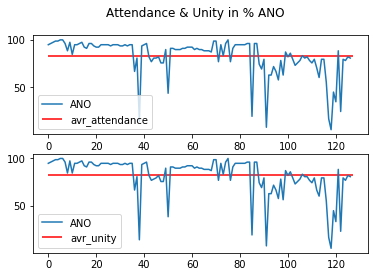

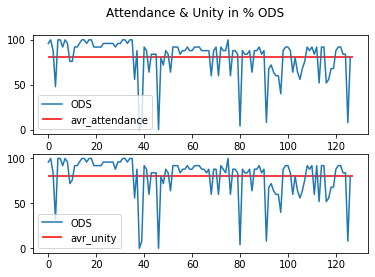

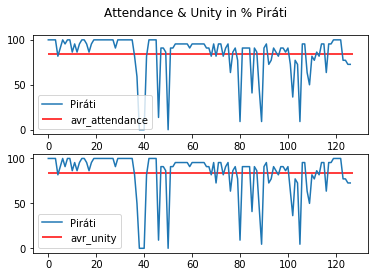

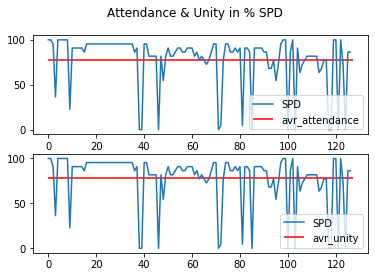

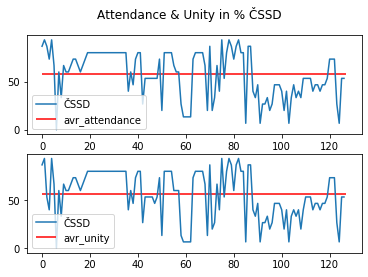

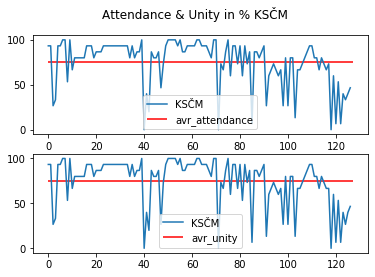

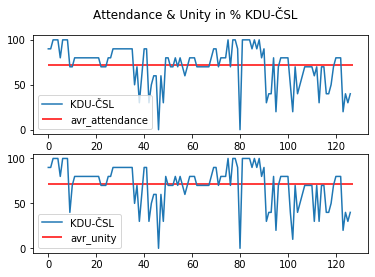

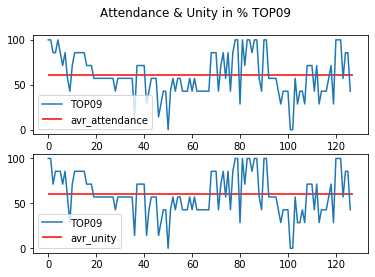

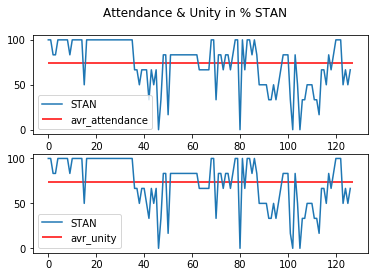

In [18]:
for i in parties:
    y1 = parties_df[(parties_df.Party_Name == i)].Ratio
    y2 = parties_df[(parties_df.Party_Name == i)].Unity
    x = range(len(parties_df[(parties_df.Party_Name == i)]))
    avr_ratio = parties_df_overall[(parties_df_overall.Party_Name == i)].Ratio
    avr_unity = parties_df_overall[(parties_df_overall.Party_Name == i)].Unity
    
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Attendance & Unity in % '+i)
    
    ax1.plot(x, y1)
    ax1.hlines(avr_ratio, 0, len(parties_df[(parties_df.Party_Name == i)]), 'r')
    ax1.legend([i, "avr_attendance"])
    
    ax2.plot(x, y2)
    ax2.hlines(avr_unity, 0, len(parties_df[(parties_df.Party_Name == i)]), 'r')
    ax2.legend([i, "avr_unity"])